In [3]:
import numpy as np
import torchvision
import torchcd cg
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim
from helper import view_classify

In [4]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,),(0.5,))
                              ])

In [5]:
trainset = datasets.MNIST('training-data', download=True, train=True, transform = transform)
valset = datasets.MNIST('training-data', download=True, train=False, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

In [6]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


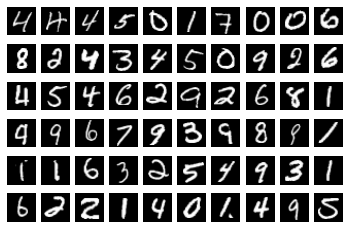

In [7]:
figure = plt.figure()
for i in range(1, 61):
    plt.subplot(6, 10, i)
    plt.axis('off')
    plt.imshow(images[i].numpy().squeeze(), cmap='gray')

In [8]:
input_size = 28*28
hidden_sizes = [128, 64]
output_size = 10

# model
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))

# cross-entropy loss for the model train (using negative log-likelihood loss)
criterion = nn.NLLLoss()
images, lables = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images) # log probability
loss = criterion(logps, labels) # calculate the NN loss

In [9]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten images into 784 long vector
        images = images.view(images.shape[0], -1)
        
        # training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        # this is where the model learns by backpropagating
        loss.backward()
        
        # and optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e ,running_loss/len(trainloader)))
print("\nTraining time (in minutes) =", (time() - time0)/60)

Epoch 0 - Training loss: 0.634602135988568
Epoch 1 - Training loss: 0.2809030304728413
Epoch 2 - Training loss: 0.21508609084511743
Epoch 3 - Training loss: 0.17469299000813
Epoch 4 - Training loss: 0.1457302193306307
Epoch 5 - Training loss: 0.1254587957818212
Epoch 6 - Training loss: 0.11094820837893371
Epoch 7 - Training loss: 0.09728526249964799
Epoch 8 - Training loss: 0.08761821106981749
Epoch 9 - Training loss: 0.07968322573694339
Epoch 10 - Training loss: 0.07264550083499553
Epoch 11 - Training loss: 0.06685390641718213
Epoch 12 - Training loss: 0.0607731820507122
Epoch 13 - Training loss: 0.05540854471555945
Epoch 14 - Training loss: 0.051114132301186894

Training time (in minutes) = 2.6413068930308023


torch.Size([1, 28, 28])
torch.Size([1, 784])
predicted digit =  9


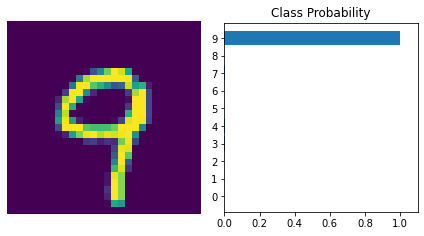

In [70]:
images , labels = next(iter(valloader))
img = images[0].view(1, 784)
print(images[0].shape)
print(img.shape)
with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("predicted digit = ", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

In [62]:
images[0].numpy()

array([[[-1.        , -1.        , -1.        , -1.        ,
         -1.        , -1.        , -1.        , -1.        ,
         -1.        , -1.        , -1.        , -1.        ,
         -1.        , -1.        , -1.        , -1.        ,
         -1.        , -1.        , -1.        , -1.        ,
         -1.        , -1.        , -1.        , -1.        ,
         -1.        , -1.        , -1.        , -1.        ],
        [-1.        , -1.        , -1.        , -1.        ,
         -1.        , -1.        , -1.        , -1.        ,
         -1.        , -1.        , -1.        , -1.        ,
         -1.        , -1.        , -1.        , -1.        ,
         -1.        , -1.        , -1.        , -1.        ,
         -1.        , -1.        , -1.        , -1.        ,
         -1.        , -1.        , -1.        , -1.        ],
        [-1.        , -1.        , -1.        , -1.        ,
         -1.        , -1.        , -1.        , -1.        ,
         -1.        , 

In [11]:
correct_count, all_count = 0, 0
for images, labels in valloader:
    for i in range(len(labels)):
        img = images[i].view(1, 784)
        with torch.no_grad():
            logps = model(img)
        
        ps = torch.exp(logps)
        probab = list(ps.numpy()[0])
        pred_label = probab.index(max(probab))
        true_label = labels.numpy()[i]
        if (true_label == pred_label):
            correct_count += 1
        all_count += 1
print("number of images tested =", all_count)
print("\nModel accuracy =", (correct_count/all_count))

number of images tested = 10000

Model accuracy = 0.975


In [ ]:
torch.save(model, './')